In [1]:
from datetime import datetime

import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_dir = '../data/internet/'
whle_dir = data_dir + 'ph_internet_whole/ph_fixedinternet_whole.shp'
centroids_dir = '../data/ndhs/ndhs-centroids/DHS Clusters Points.shp'

In [3]:
ph_fixed_tiles = gp.read_file(whle_dir).to_crs('+proj=cea')

centroids_ = gp.read_file(centroids_dir).to_crs('+proj=cea')
centroids_.sort_values('DHSCLUST', inplace=True)

In [30]:
ph_boundary = '../data/internet/ph_level2admin/PHL_adm2.shp'
ph_boundary = gp.read_file(ph_boundary).to_crs('+proj=cea')
lowest = centroids_[centroids_['DHSCLUST'] == 1182]

lowest = gp.sjoin(lowest, ph_boundary, how='left', op='intersects')

In [36]:
dhs_indicators = '../data/ndhs/dhs_indicators.csv'
dhs_indicators = pd.read_csv(dhs_indicators)
dhs_indicators

,cluster_number,wealth_index,education_completed_yrs,electricity_access
0,1,-31881.608696,9.391304,0.913043
1,2,-2855.375000,9.708333,0.958333
2,3,-57647.047619,8.428571,0.857143
3,4,-54952.666667,6.714286,0.809524
4,5,-77819.160000,8.240000,0.920000
...,...,...,...,...
1244,1246,-45677.120000,9.040000,1.000000
1245,1247,-135111.920000,4.240000,0.880000
1246,1248,-14459.166667,7.875000,1.000000
1247,1249,-51500.272727,9.045455,0.909091


In [41]:
centroids_ = centroids_.merge(dhs_indicators, left_on='DHSCLUST', right_on='cluster_number')

In [45]:
ph_boundary = '../data/internet/philippine_boundary/PHL_adm0.shp'
ph_boundary = gp.read_file(ph_boundary).to_crs('+proj=cea')

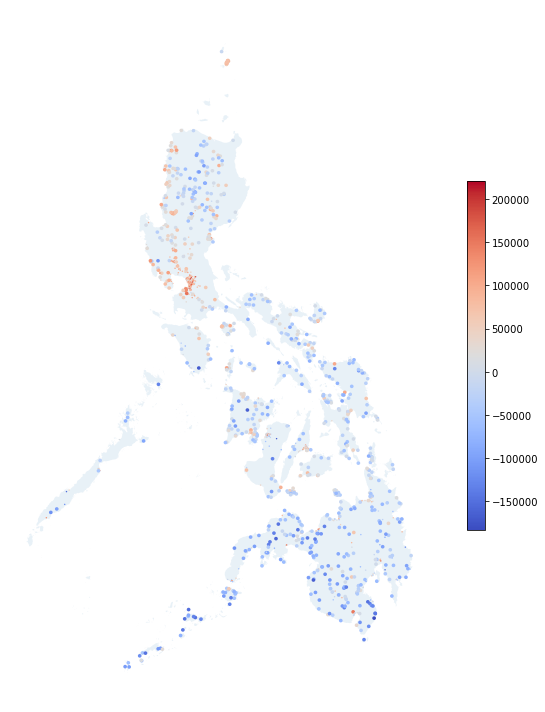

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
ph_boundary.plot(ax=ax, alpha=0.1)
centroids_.plot(ax=ax, column='wealth_index', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.5})
sns.despine(left=True, bottom=True)
plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.savefig('../images/wi_heatmap.png', dpi=300, pad_inches=0, transparent=True)

In [13]:
centroids_

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,LONGNUM,ALT_GPS,ALT_DEM,area,num_roads,num_trunk,num_primar,dist_trunk,dist_prima,geometry
1069,PH201700000001,PH,2017,1,NULL,NULL,NULL,NULL,NULL,15,...,122.108254,9999,10,81.202312,63.0,NaN,8.0,27634.69823,1159.38051,"POLYGON ((13598322.190 736421.153, 13598306.41..."
1070,PH201700000002,PH,2017,2,NULL,NULL,NULL,NULL,NULL,15,...,122.130474,9999,5,81.204313,66.0,NaN,7.0,29371.36496,747.94705,"POLYGON ((13600795.723 735059.476, 13600779.94..."
1071,PH201700000003,PH,2017,3,NULL,NULL,NULL,NULL,NULL,15,...,122.177943,9999,47,81.210811,23.0,NaN,3.0,35036.40238,1110.02794,"POLYGON ((13606079.990 730617.762, 13606064.21..."
1072,PH201700000004,PH,2017,4,NULL,NULL,NULL,NULL,NULL,15,...,122.136408,9999,366,81.232461,27.0,NaN,4.0,48801.22270,2293.28882,"POLYGON ((13601456.759 715617.782, 13601440.98..."
1073,PH201700000006,PH,2017,6,NULL,NULL,NULL,NULL,NULL,15,...,121.914540,9999,151,81.209586,21.0,NaN,7.0,37196.67916,1533.69459,"POLYGON ((13576758.203 731456.532, 13576742.42..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,PH201700001246,PH,2017,1246,NULL,NULL,NULL,NULL,NULL,12,...,124.550762,9999,34,81.193276,182.0,3.0,NaN,3037.09854,5226.92774,"POLYGON ((13870220.143 742548.326, 13870204.36..."
1000,PH201700001247,PH,2017,1247,NULL,NULL,NULL,NULL,NULL,12,...,124.945196,9999,82,81.187381,21.0,NaN,NaN,6409.25998,5179.46772,"POLYGON ((13914128.144 746514.182, 13914112.36..."
1001,PH201700001248,PH,2017,1248,NULL,NULL,NULL,NULL,NULL,12,...,124.594840,9999,51,81.207390,381.0,13.0,3.0,40.39703,4556.25290,"POLYGON ((13875127.118 732966.840, 13875111.34..."
257,PH201700001249,PH,2017,1249,NULL,NULL,NULL,NULL,NULL,12,...,124.618097,9999,128,12.857311,27.0,NaN,NaN,3963.49211,9798.17575,"POLYGON ((13874633.106 711158.388, 13874626.83..."


In [4]:
ph_fixed_tiles.set_geometry(ph_fixed_tiles.geometry.centroid, inplace=True)
centroids_.set_geometry(centroids_.geometry.centroid, inplace=True)

In [6]:
#distance_set = []
#for i in centroid_pts[10:30]:
    #distances = []
    #for j in internet_pts:
        #distances.append(i.distance(j) <= 5000)
    #distance_set.append(distances)

#surrounding_pts = []
#for ind, i in enumerate(distance_set):
    #surrounding_pts.append(internet_pts[distance_set[ind]])
#ave_speed_per_cluster = []
#for i in surrounding_pts:
    #speeds = []
    #for _ in i:
        #speeds.append(ph_fixed_tiles[ph_fixed_tiles.geometry == _]['avg_d_kbps'].item())
    #ave_speed_per_cluster.append(np.mean(speeds))

In [5]:
from scipy.stats import skew, kurtosis
def summary_stat(series_, mean_arr, max_arr, min_arr, std_arr, median_arr, skew_arr, cov_arr, kurtosis_arr):
    
    mean_arr.append(np.mean(series_))
    max_arr.append(np.max(series_))
    min_arr.append(np.min(series_))
    std_arr.append(np.std(series_))
    median_arr.append(np.median(series_))
    skew_arr.append(skew(series_))
    cov_arr.append(np.cov(series_))
    kurtosis_arr.append(kurtosis(series_))

In [6]:
# fig, ax = plt.subplots(figsize=(100,100))
# ph_fixed_tiles.plot(ax=ax)
# centroids_.plot(ax=ax)

avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis = [], [], [], [], [], [], [], []

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
datapoints_per_cluster = []
for i in range(len(buffers_)):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_fixed_tiles, buffers_test, how='inner', op='within')
    # intpoint_test.plot(ax=ax, color='purple', alpha=0.1)
    _ = summary_stat(intpoint_test.avg_d_kbps, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis)
    _ = summary_stat(intpoint_test.avg_u_kbps, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis)
    _ = summary_stat(intpoint_test.avg_lat_ms, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis)
    datapoints_per_cluster.append(intpoint_test.shape[0])

with_no_data = 0
for i in datapoints_per_cluster:
    with_no_data = with_no_data + 1 if i == 0 else with_no_data
print('The number of points without data is {}, and the number of points with data is {}'.format(with_no_data, len(datapoints_per_cluster) - with_no_data))

# centroids_[:10].plot(ax=ax, color='red')


# buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
# data_in_buffers = gp.sjoin(ph_fixed_tiles, buffers_, how='inner', op='within')

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/5593023.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/5593023.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_di

The number of points without data is 147, and the number of points with data is 1067


### Save the Summary Statistics as DataFrames

In [7]:
dhsclust = list(centroids_.DHSCLUST)

avg_d_kbps_summary_stats = [dhsclust, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis, datapoints_per_cluster]
avg_d_kbps_summary_stats = pd.DataFrame(avg_d_kbps_summary_stats).transpose()
avg_d_kbps_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']

avg_u_kbps_summary_stats = [dhsclust, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis, datapoints_per_cluster]
avg_u_kbps_summary_stats = pd.DataFrame(avg_u_kbps_summary_stats).transpose()
avg_u_kbps_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']


avg_lat_ms_summary_stats = [dhsclust, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis, datapoints_per_cluster]
avg_lat_ms_summary_stats = pd.DataFrame(avg_lat_ms_summary_stats).transpose()
avg_lat_ms_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']

In [8]:
avg_d_kbps_summary_stats.to_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats.to_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats.to_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv')

### Load Summary Statistics

In [81]:
avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv')

### Summary Statistics On Mean Values (among Clusters)

In [4]:
TM_pal_categorical_3 = ("#ef4631", "#10b9ce", "#ff9138")
sns.set(
    style="white",
    font_scale=1.25,
    palette=TM_pal_categorical_3,
)

In [23]:
avg_lat_ms_summary_stats['MeanMinusMedian'].head(30)

0      4.125000
1      3.375000
2      0.000000
3      0.000000
4      0.000000
5           NaN
6           NaN
7      9.333333
8           NaN
9     52.666667
10          NaN
11    16.138889
12    17.454545
13     0.782609
14     7.100000
15    10.074074
16    16.093750
17     0.000000
18          NaN
19     1.000000
20          NaN
21          NaN
22          NaN
23    26.571429
24          NaN
25          NaN
26     9.333333
27          NaN
28     1.866667
29     4.111111
Name: MeanMinusMedian, dtype: float64

Average National Download Speed : 12.95 Mbps
Median of National Download Speed : 12.33 Mbps
Maximum National Download Speed : 34.03 Mbps
Minimum National Download Speed : 0.14 Mbps
Standard Deviation of National Download Speed : 7.43


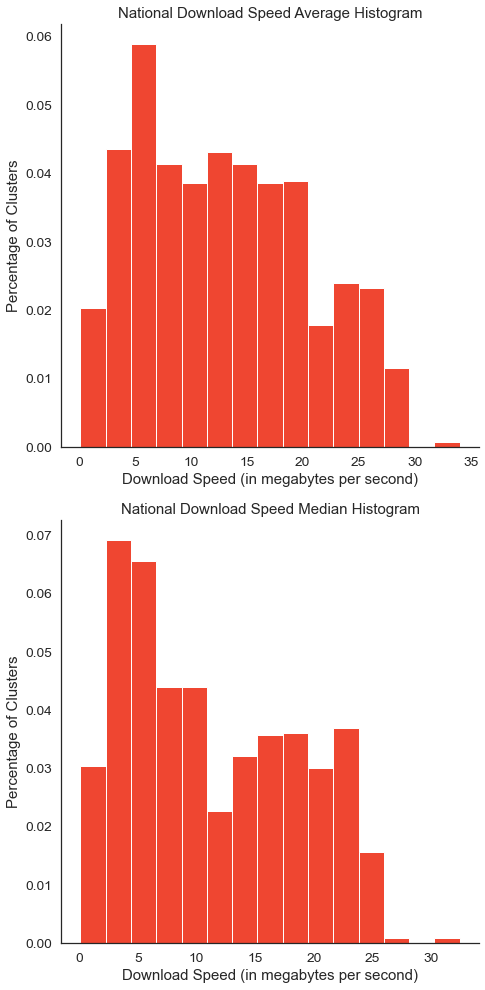

In [11]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_d_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Download Speed Average Histogram')
_ = ax[0].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')
_ = sns.despine()

_ = ax[1].hist(avg_d_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Download Speed Median Histogram')
_ = ax[1].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

plt.tight_layout()
plt.savefig('../data/internet/images/fixed dl_sumstats_HIST.png', transparent=True)

Average National Upload Speed : 12.21 Mbps
Median of National Upload Speed : 11.45 Mbps
Maximum National Upload Speed : 43.19 Mbps
Minimum National Upload Speed : 0.08 Mbps
Standard Deviation of National Upload Speed : 7.80


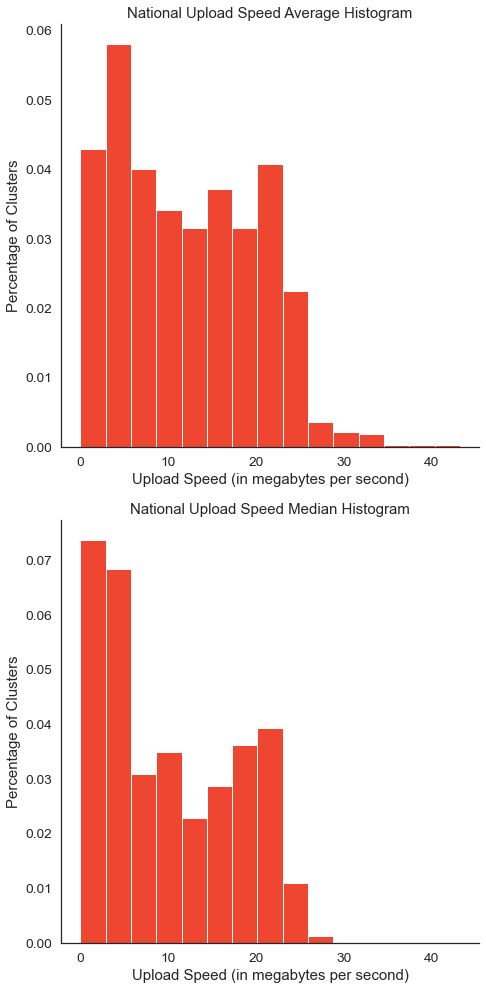

In [13]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.nanmean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.nanmedian(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_u_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Upload Speed Average Histogram')
_ = ax[0].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_u_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Upload Speed Median Histogram')
_ = ax[1].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/fixed ul_sumstats_HIST.png', transparent=True)

In [14]:
# count and remove the number of outliers within the interquartile range 0.25 to 0.75

def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

_ = Remove_Outlier_Indices(avg_lat_ms_summary_stats['Mean'])
print('The number of outliers is {}'.format(avg_lat_ms_summary_stats.shape[0] - _.sum()))

avg_lat_ms_summary_stats = avg_lat_ms_summary_stats[_]

The number of outliers is 40


Average National Latency : 51.42 ms
Median of National Latency : 46.00 ms
Maximum National Latency : 124.21 ms
Minimum National Latency : 3.50 ms
Standard Deviation of National Latency : 24.71


C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/14354880.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../data/internet/images/fixed lat_sumstats_HIST.png', transparency=True)


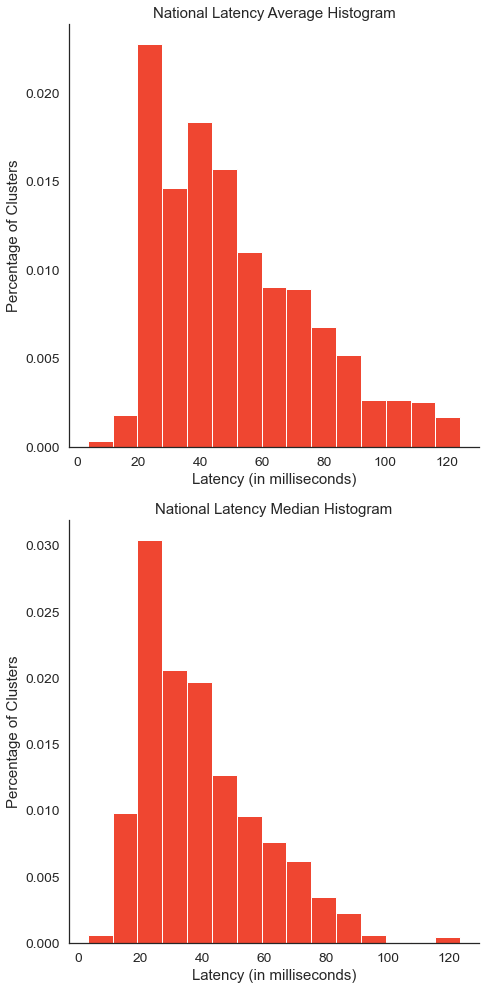

In [16]:
print('Average National Latency : {:.2f} ms'.format(np.nanmean(avg_lat_ms_summary_stats['Mean'])))
print('Median of National Latency : {:.2f} ms'.format(np.nanmedian(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_lat_ms_summary_stats['Mean'], bins=15, density=True)
_ = ax[0].set_title('National Latency Average Histogram')
_ = ax[0].set_xlabel('Latency (in milliseconds)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_lat_ms_summary_stats['Median'], bins=15, density=True)
_ = ax[1].set_title('National Latency Median Histogram')
_ = ax[1].set_xlabel('Latency (in milliseconds)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/fixed lat_sumstats_HIST.png', transparency=True)

In [84]:
avg_d_kbps_summary_stats['Number of Datapoints'].min()

-1

Average Number of Datapoints : 57.25 Points
Median Number of Datapoints : 23.00 Points
Maximum Number of Datapoints : 228.00 Points
Minimum Number of Datapoints : 0.00 Points
Standard Deviation of Number of Datapoints : 68.72


C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_15420/1379475736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoints_per_cluster[datapoints_per_cluster == -1] = 0
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_15420/1379475736.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../data/internet/images/fixed num_internet_datapoints_HIST.png', transparency=True)


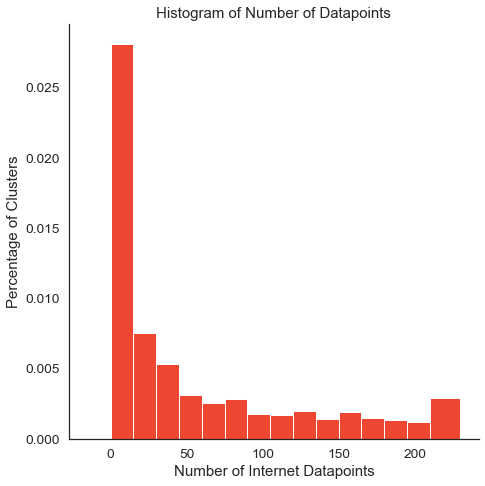

In [87]:
fig, ax = plt.subplots(figsize=(7, 7))

print('Average Number of Datapoints : {:.2f} Points'.format(np.mean(datapoints_per_cluster)))
print('Median Number of Datapoints : {:.2f} Points'.format(np.median(datapoints_per_cluster)))
print('Maximum Number of Datapoints : {:.2f} Points'.format(max(datapoints_per_cluster)))
print('Minimum Number of Datapoints : {:.2f} Points'.format(min(datapoints_per_cluster)))
print('Standard Deviation of Number of Datapoints : {:.2f}'.format(np.std(datapoints_per_cluster)))

datapoints_per_cluster = avg_d_kbps_summary_stats['Number of Datapoints']
datapoints_per_cluster[datapoints_per_cluster == -1] = 0
bins = [-15, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 230]

_ = plt.hist(datapoints_per_cluster, bins=bins, density=True)
_ = plt.title('Histogram of Number of Datapoints')
_ = plt.xlabel('Number of Internet Datapoints'); _ = plt.ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/fixed num_internet_datapoints_HIST.png', transparency=True)


In [ ]:
avg_d_kbps_summary_stats[avg_d_kbps_summary_stats['Number of Datapoints']]

### Plotting Mean Download Speeds

### Imputation

In [85]:
avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_15420/3133463364.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv').drop('Unnamed: 0', 1)


In [72]:
avg_d_kbps_summary_stats['Mean'].fillna(min(avg_d_kbps_summary_stats['Mean']), inplace=True)
avg_d_kbps_summary_stats['Minimum'].fillna(min(avg_d_kbps_summary_stats['Minimum']), inplace=True)
avg_d_kbps_summary_stats['Maximum'].fillna(min(avg_d_kbps_summary_stats['Maximum']), inplace=True)
avg_d_kbps_summary_stats['Median'].fillna(min(avg_d_kbps_summary_stats['Median']), inplace=True)
avg_d_kbps_summary_stats['Skew'].fillna(min(avg_d_kbps_summary_stats['Skew']), inplace=True)
avg_d_kbps_summary_stats['Coefficient of Variation'].fillna(max(avg_d_kbps_summary_stats['Coefficient of Variation']), inplace=True)
avg_d_kbps_summary_stats['Kurtosis'].fillna(min(avg_d_kbps_summary_stats['Kurtosis']), inplace=True)
avg_d_kbps_summary_stats['Standard Deviation'].fillna(max(avg_d_kbps_summary_stats['Standard Deviation']), inplace=True)

avg_d_kbps_summary_stats.to_csv('../data/internet/summary_stats/imputed_fixed download_speeds_summary_stats.csv')

Average National Download Speed : 11.40 Mbps
Median of National Download Speed : 10.55 Mbps
Maximum National Download Speed : 34.03 Mbps
Minimum National Download Speed : 0.14 Mbps
Standard Deviation of National Download Speed : 8.12


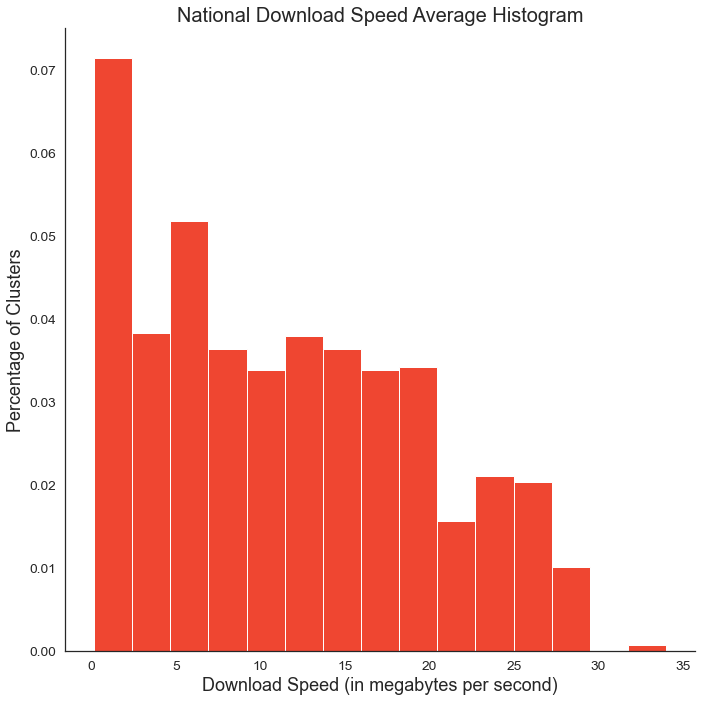

In [76]:
TM_pal_categorical_3 = ("#ef4631", "#10b9ce", "#ff9138")
sns.set(
    style="white",
    font_scale=1.25,
    palette=TM_pal_categorical_3,
)

print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(figsize=(10, 10))

_ = plt.hist(avg_d_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax.set_title('National Download Speed Average Histogram', size=20)
_ = ax.set_xlabel('Download Speed (in megabytes per second)', size=18); _ = ax.set_ylabel('Percentage of Clusters', size=18)
_ = sns.despine()
plt.tight_layout()
plt.savefig('../images/dlspeed_hist.png', transparent=True, dpi=300, pad_inches=0)

Average National Download Speed : 11.40 Mbps
Median of National Download Speed : 10.55 Mbps
Maximum National Download Speed : 34.03 Mbps
Minimum National Download Speed : 0.14 Mbps
Standard Deviation of National Download Speed : 8.12


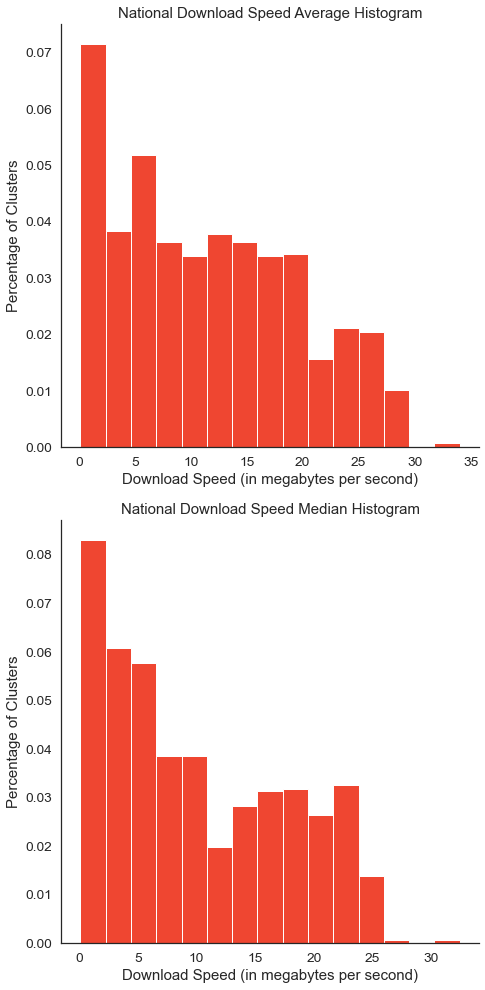

In [20]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_d_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Download Speed Average Histogram')
_ = ax[0].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')
_ = sns.despine()

_ = ax[1].hist(avg_d_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Download Speed Median Histogram')
_ = ax[1].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

plt.tight_layout()
plt.savefig('../data/internet/images/imputed_fixed dl_sumstats_HIST.png', transparent=True)

In [35]:
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/2055448782.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv').drop('Unnamed: 0', 1)


In [36]:
avg_u_kbps_summary_stats['Mean'].fillna(min(avg_u_kbps_summary_stats['Mean']), inplace=True)
avg_u_kbps_summary_stats['Minimum'].fillna(min(avg_u_kbps_summary_stats['Minimum']), inplace=True)
avg_u_kbps_summary_stats['Maximum'].fillna(min(avg_u_kbps_summary_stats['Maximum']), inplace=True)
avg_u_kbps_summary_stats['Median'].fillna(min(avg_u_kbps_summary_stats['Median']), inplace=True)
avg_u_kbps_summary_stats['Skew'].fillna(min(avg_u_kbps_summary_stats['Skew']), inplace=True)
avg_u_kbps_summary_stats['Coefficient of Variation'].fillna(max(avg_u_kbps_summary_stats['Coefficient of Variation']), inplace=True)
avg_u_kbps_summary_stats['Kurtosis'].fillna(min(avg_u_kbps_summary_stats['Kurtosis']), inplace=True)
avg_u_kbps_summary_stats['Standard Deviation'].fillna(max(avg_u_kbps_summary_stats['Standard Deviation']), inplace=True)

avg_u_kbps_summary_stats.to_csv('../data/internet/summary_stats/imputed_fixed upload_speeds_summary_stats.csv')

Average National Upload Speed : 10.74 Mbps
Median of National Upload Speed : 9.51 Mbps
Maximum National Upload Speed : 43.19 Mbps
Minimum National Upload Speed : 0.08 Mbps
Standard Deviation of National Upload Speed : 8.32


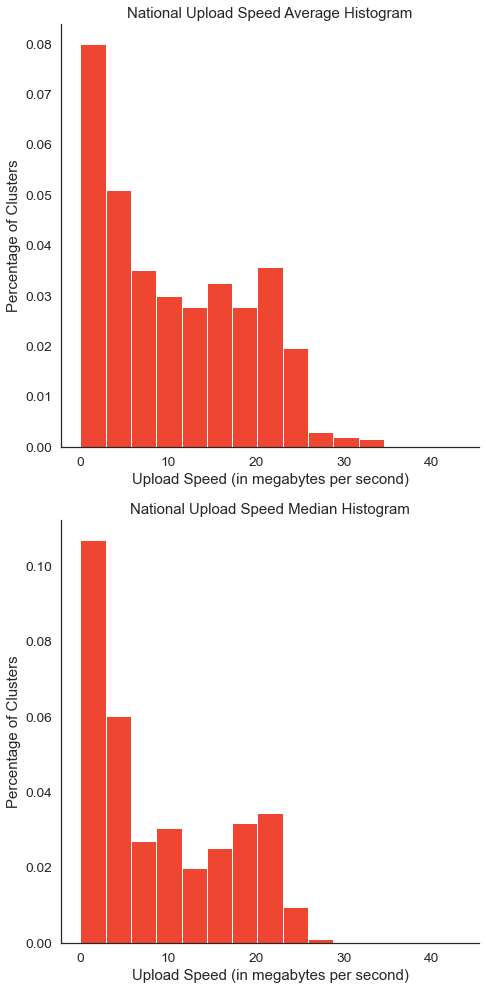

In [23]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.nanmean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.nanmedian(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_u_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Upload Speed Average Histogram')
_ = ax[0].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_u_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Upload Speed Median Histogram')
_ = ax[1].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/imputed_fixed ul_sumstats_HIST.png', transparent=True)

In [32]:
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/53583155.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv').drop('Unnamed: 0', 1)


In [33]:
# mark the outliers
def mark_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList
outliers = mark_outliers(avg_lat_ms_summary_stats['Mean'])

# make outliers NaN
avg_lat_ms_summary_stats.loc[outliers, 'Standard Deviation'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Minimum'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Maximum'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Skew'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Coefficient of Variation'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Kurtosis'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Mean'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Median'] = np.nan

In [34]:
avg_lat_ms_summary_stats['Mean'].fillna(max(avg_lat_ms_summary_stats['Mean']), inplace=True)
avg_lat_ms_summary_stats['Minimum'].fillna(max(avg_lat_ms_summary_stats['Minimum']), inplace=True)
avg_lat_ms_summary_stats['Maximum'].fillna(max(avg_lat_ms_summary_stats['Maximum']), inplace=True)
avg_lat_ms_summary_stats['Median'].fillna(max(avg_lat_ms_summary_stats['Median']), inplace=True)
avg_lat_ms_summary_stats['Skew'].fillna(max(avg_lat_ms_summary_stats['Skew']), inplace=True)
avg_lat_ms_summary_stats['Coefficient of Variation'].fillna(max(avg_lat_ms_summary_stats['Coefficient of Variation']), inplace=True)
avg_lat_ms_summary_stats['Kurtosis'].fillna(max(avg_lat_ms_summary_stats['Kurtosis']), inplace=True)
avg_lat_ms_summary_stats['Standard Deviation'].fillna(max(avg_lat_ms_summary_stats['Standard Deviation']), inplace=True)

avg_lat_ms_summary_stats.to_csv('../data/internet/summary_stats/imputed_fixed latency_summary_stats.csv')

Average National Latency : 62.63 ms
Median of National Latency : 51.67 ms
Maximum National Latency : 124.21 ms
Minimum National Latency : 3.50 ms
Standard Deviation of National Latency : 34.74


C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/3361564327.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../data/internet/images/imputed_fixed lat_sumstats_HIST.png', transparency=True)


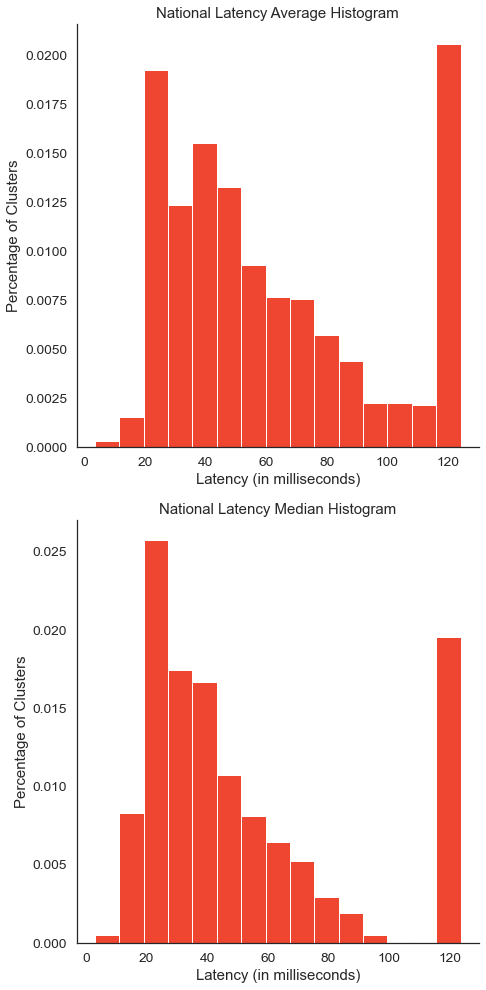

In [31]:
print('Average National Latency : {:.2f} ms'.format(np.nanmean(avg_lat_ms_summary_stats['Mean'])))
print('Median of National Latency : {:.2f} ms'.format(np.nanmedian(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_lat_ms_summary_stats['Mean'], bins=15, density=True)
_ = ax[0].set_title('National Latency Average Histogram')
_ = ax[0].set_xlabel('Latency (in milliseconds)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_lat_ms_summary_stats['Median'], bins=15, density=True)
_ = ax[1].set_title('National Latency Median Histogram')
_ = ax[1].set_xlabel('Latency (in milliseconds)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/imputed_fixed lat_sumstats_HIST.png', transparency=True)

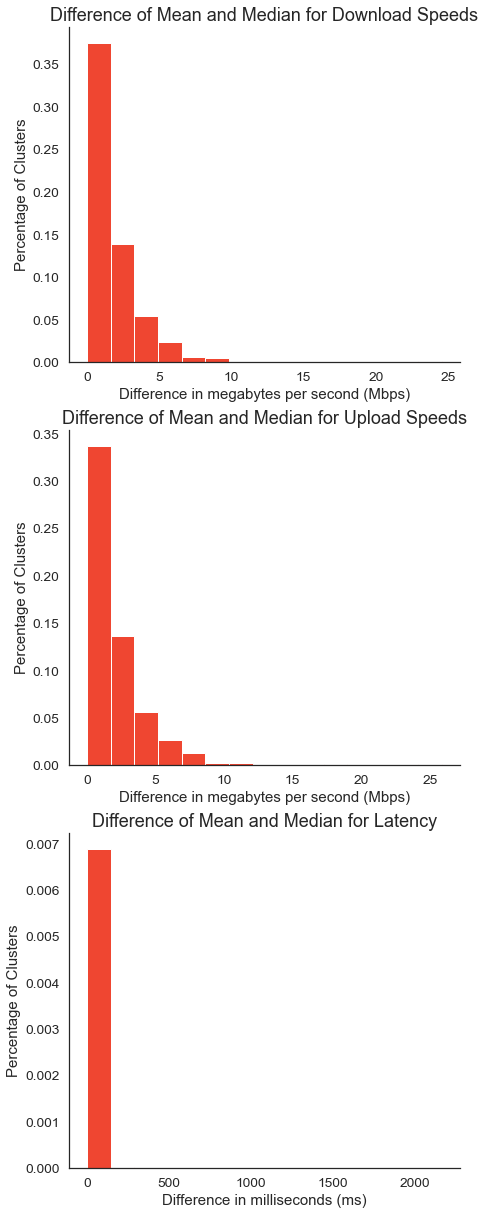

In [25]:
# mean minus median, not imputed

avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv')

fig, ax = plt.subplots((3), figsize=(7, 21))
avg_d_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_d_kbps_summary_stats['Mean'] - avg_d_kbps_summary_stats['Median'])
avg_u_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_u_kbps_summary_stats['Mean'] - avg_u_kbps_summary_stats['Median'])
avg_lat_ms_summary_stats['MeanMinusMedian'] = np.abs(avg_lat_ms_summary_stats['Mean'] - avg_lat_ms_summary_stats['Median'])
_ = ax[0].hist(avg_d_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[0].set_title('Difference of Mean and Median for Download Speeds', size=18); _ = ax[0].set_ylabel('Percentage of Clusters'); _ = ax[0].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[1].hist(avg_u_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[1].set_title('Difference of Mean and Median for Upload Speeds', size=18); _ = ax[1].set_ylabel('Percentage of Clusters'); _ = ax[1].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[2].hist(avg_lat_ms_summary_stats['MeanMinusMedian'], bins=15, density=True); _ = ax[2].set_title('Difference of Mean and Median for Latency', size=18); _ = ax[2].set_ylabel('Percentage of Clusters'); _ = ax[2].set_xlabel('Difference in milliseconds (ms)')

sns.despine()

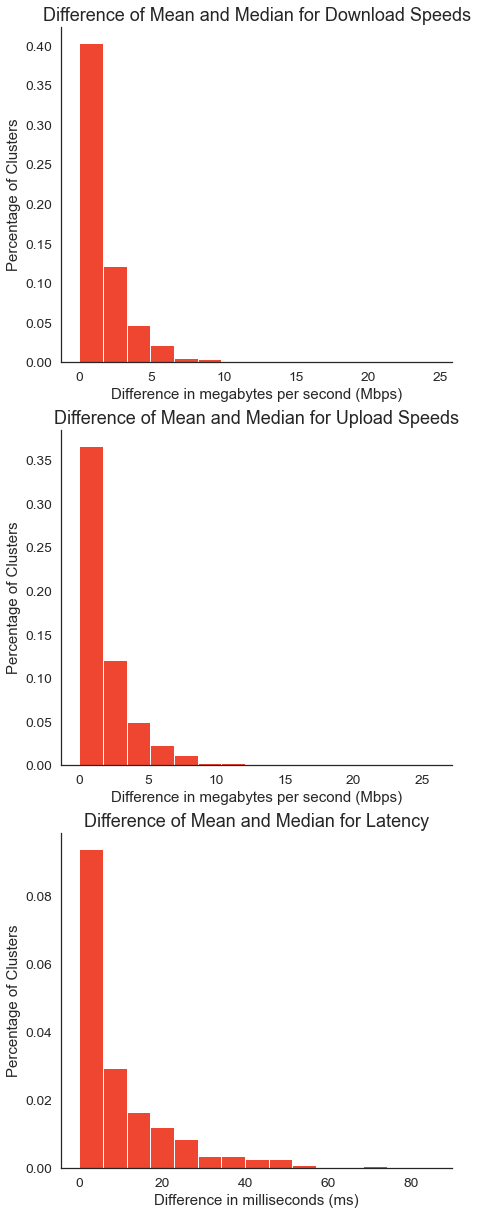

In [27]:
# mean minus median, imputed

avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/imputed_fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/imputed_fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/imputed_fixed latency_summary_stats.csv')

fig, ax = plt.subplots((3), figsize=(7, 21))
avg_d_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_d_kbps_summary_stats['Mean'] - avg_d_kbps_summary_stats['Median'])
avg_u_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_u_kbps_summary_stats['Mean'] - avg_u_kbps_summary_stats['Median'])
avg_lat_ms_summary_stats['MeanMinusMedian'] = np.abs(avg_lat_ms_summary_stats['Mean'] - avg_lat_ms_summary_stats['Median'])
_ = ax[0].hist(avg_d_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[0].set_title('Difference of Mean and Median for Download Speeds', size=18); _ = ax[0].set_ylabel('Percentage of Clusters'); _ = ax[0].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[1].hist(avg_u_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[1].set_title('Difference of Mean and Median for Upload Speeds', size=18); _ = ax[1].set_ylabel('Percentage of Clusters'); _ = ax[1].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[2].hist(avg_lat_ms_summary_stats['MeanMinusMedian'], bins=15, density=True); _ = ax[2].set_title('Difference of Mean and Median for Latency', size=18); _ = ax[2].set_ylabel('Percentage of Clusters'); _ = ax[2].set_xlabel('Difference in milliseconds (ms)')

sns.despine()